Para este proyecto, veremos un algoritmo muy particular llamado Support Vector Machine. 

Este algoritmo busca separar datos por medio de hiperplanos como se puede apreciar en la siguiente imagen.

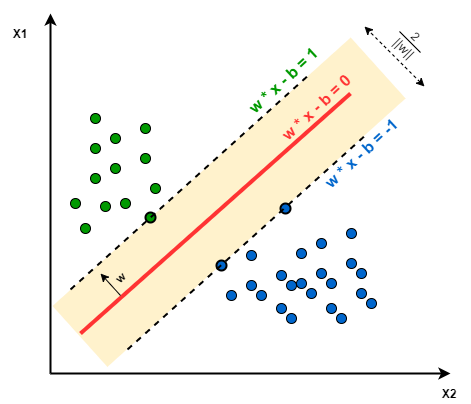

Entre los pros y contras que tenemos podemos mencionar lo siguiente:

Pros

* Efectivo para espacios con dimensiones altas.

* Efectivo cuando el numero de dimensiones es mayor al numero de observaciones.

* Eficiente en cuanto al uso de memoria.

* Muy flexible y versátil.

Contras

* Si hay muchos mas features que observaciones, es necesario escoger un kernel apropiado para evitar el overfitting y regularizar terminos.

* SVM no nos da la probabilidad de pertenencia a una clase.

* Complicado de utilizar para datasets con un gran numero de observaciones.

A lo largo del notebook iremos detallando conceptos e ideas para poder entender mejor como utilizarlo en un problema de clasificación.

# PROBLEMA


El dataset a trabajar es pequeño y contiene datos sobre celulares. El objetivo a estudiar es:

* Encontrar las relaciones entre los features de un celular.
* Categorizar los celulares en un rango de precio, donde:

>> 0 : Low cost

>> 1 : Medium cost

>> 2 : High cost

>> 3 : Very High cost

[Link de descarga del dataset](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)


#Limpieza de datos

Importamos las librerias iniciales que usaremos para trabajar, y montamos el google drive al notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


Damos un vistazo general a las primeras 5 filas de los datos, siempre es bueno hacer esto para ver que todo este en orden.

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/CLASES DATOS/DATASETS/MOBILE PRICE CLASSIFICATION/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Analizamos la estructura y forma de los datos

In [57]:
df.shape

# un dataset pequeño, bueno para el algoritmo que estamos viendo

(2000, 21)

In [6]:
df.info()

# No hay valores nulos
# Todos los features son de naturaleza numerica

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [58]:
# una forma comoda de visualizar las columnas
df.columns.tolist()

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

Sumario de lo que significa cada variable

* battery_power : Total energy a battery can store in one time measured in mAh

* blue : Has bluetooth or not

* clock_speed : speed at which microprocessor executes instructions

* dual_sim : Has dual sim support or not

* fc : Front Camera mega pixels

* four_g : Has 4G or not

* int_memory : Internal Memory in Gigabytes

* m_dep : Mobile Depth in cm

* mobile_wt : Weight of mobile phone

* n_cores : Number of cores of processor

* pc : primary Camera mega pixels

* px_height : Pixel Resolution Height

* px_width : Pixel Resolution Width

* ram : Random Access Memory in Megabytes

* sc_h : Screen Height of mobile in cm

* sc_w : Screen Width of mobile in cm

* talk_time : longest time that a single battery charge will last when you are

* three_g : Has 3G or not

* touch_screen : Has touch screen or not

* wifi : Has wifi or not

* price_range : target

Revsisamos que la columna a predecir tenga solo los valores que queremos : 0,1,2,3.

In [8]:
df.price_range.unique()

array([1, 2, 3, 0])

EXPLORACION DE VARIABLES

In [9]:
# Revisemos las variables, iniciando por las binarias

binarias  = ['blue','dual_sim','four_g','three_g', 'touch_screen','wifi']

for bi in binarias:
    print('Variable: '+bi)
    print(df[bi].value_counts())
    print('\n')

# Vemos que todas ellas tienen valores de 0 y 1, lo cual esta bien.    

Variable: blue
0    1010
1     990
Name: blue, dtype: int64


Variable: dual_sim
1    1019
0     981
Name: dual_sim, dtype: int64


Variable: four_g
1    1043
0     957
Name: four_g, dtype: int64


Variable: three_g
1    1523
0     477
Name: three_g, dtype: int64


Variable: touch_screen
1    1006
0     994
Name: touch_screen, dtype: int64


Variable: wifi
1    1014
0     986
Name: wifi, dtype: int64




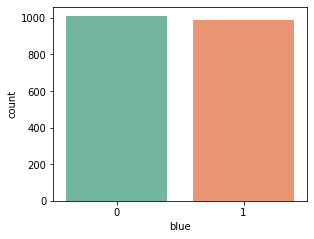

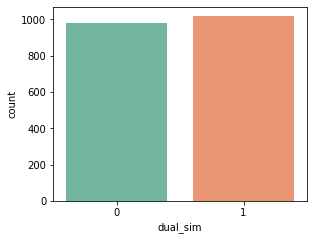

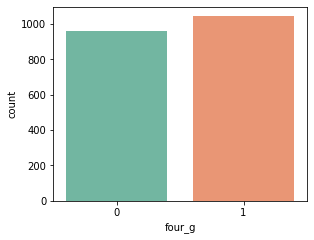

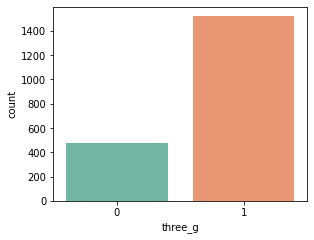

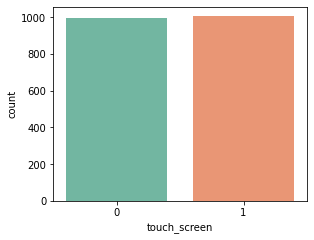

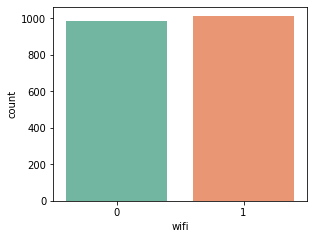

In [10]:
#observamos la distribucion de las variables  

for bi in binarias:
    plt.figure(figsize = (10,25))
    plt.subplot(len(binarias),2,2)
    sns.countplot(x = bi, palette = 'Set2', data = df)
    plt.show()

In [11]:
# Hay algunas variables que llaman la atencion como las dimensiones de los celulares.
dimen = ['m_dep','sc_h','sc_w']
df[dimen].describe()

,m_dep,sc_h,sc_w
count,2000.000000,2000.000000,2000.000000
mean,0.501750,12.306500,5.767000
std,0.288416,4.213245,4.356398
min,0.100000,5.000000,0.000000
25%,0.200000,9.000000,2.000000
50%,0.500000,12.000000,5.000000
75%,0.800000,16.000000,9.000000
max,1.000000,19.000000,18.000000


Algo esta raro, en sc_w (ancho del celular), nos figura como valor minimo 0 cm.

Eso es imposible

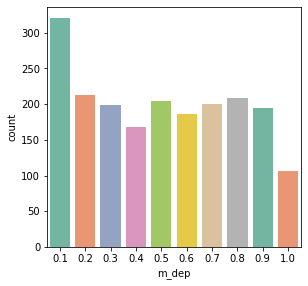

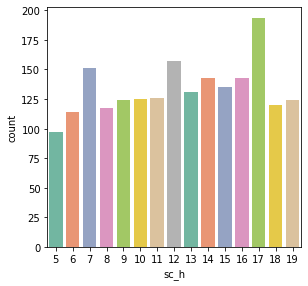

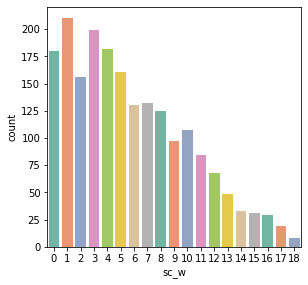

In [12]:
for di in dimen:
    plt.figure(figsize = (10,15))
    plt.subplot(len(dimen),2,2)
    sns.countplot(x = di, palette = 'Set2', data = df)
    plt.show()

Vemos que tenemos un gran numero de celulares cuyo ancho de pantalla es 0 cm.

Lo mas probable es que sea un error de computo o ese valor se ha perdido.

Al ser una gran cantidad de valores perdidos, lo mejor sera trabajarlos en lugar de eliminarlos del dataset.


In [13]:
df['sc_w'].value_counts(normalize = True)*100

#los datos de ancho 0 son el 9% de los datos, hay que trabajarlos.

1     10.50
3      9.95
4      9.10
0      9.00
5      8.05
2      7.80
7      6.60
6      6.50
8      6.25
10     5.35
9      4.85
11     4.20
12     3.40
13     2.45
14     1.65
15     1.55
16     1.45
17     0.95
18     0.40
Name: sc_w, dtype: float64

In [14]:
# Como los datos de ancho 0 pueden ser considerados missing, haremos el reemplazo

df.loc[df['sc_w'] == 0 ,'sc_w' ]  = np.nan

In [15]:
#Vemos que ya no figura el valor 0, sino nan.
df['sc_w'].unique()

array([ 7.,  3.,  2.,  8.,  1., 10.,  9., nan, 15., 13.,  5., 11.,  4.,
       12.,  6., 17., 14., 16., 18.])

In [16]:
# Usamos un metodo de imputacion 

from sklearn.impute import SimpleImputer

# Generamos el imputador iterativo - Imputacion Univariada Numerica

imputador = SimpleImputer(missing_values = np.nan, strategy='median')

In [17]:
#ajustamos el imputador
imputador.fit(df)

#transformamos la data

data_2 = imputador.transform(df)

# creamos un nuevo dataframe

df_2 = pd.DataFrame(data = data_2 , columns = df.columns)

# observamos que ya no tenemos valores NaN , ni 0
df_2['sc_w'].unique()

array([ 7.,  3.,  2.,  8.,  1., 10.,  9.,  6., 15., 13.,  5., 11.,  4.,
       12., 17., 14., 16., 18.])

In [19]:
#configurando un poco los graficos

sns.set(style = 'darkgrid', #cambiando el estilo de la imagen
        palette = 'dark', # cambio en la paleta de colores
        font = "sans-serif", #Cambio en la fuente 
        font_scale = 1 #Tamaño de la fuente
        )

Un paso importante es ver la correlacion de las variables entre si. 

Aunque el objetivo principal es ver como cada variable independiente (features) afecta a la variable dependient (target), tambien es bueno revisar si algun feature tiene influencia sobre uno o varios (colinealidad o multicolinealidad). Dependiendo de que tipo de trabajo estemos haciendo la co o multico puede afectar el desempeño de nuestro algoritmo.

<AxesSubplot:>

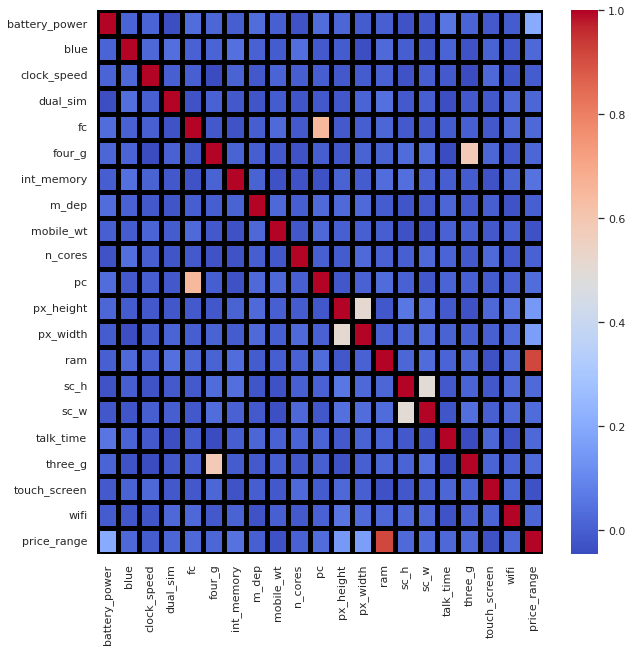

In [22]:
corr = df_2.corr()

fig, ax = plt.subplots(figsize=(10,10))         

sns.heatmap(corr,
            annot = False,
            linewidths=.5,
            cmap = 'coolwarm' ,
            ax=ax,
            linewidth = 5,
            linecolor= 'black',
            square = False)

Este Heatmap nos permite ver la correlacion de las variables, donde podemos observar que la mayoria de ellas son no correlacionadas; sin embargo, algunas de ellas si muestran un valor de correlacion distinto del cero, siendo la mas alta RAM-Price_Range.
Las variables pueden estar relacionadas de forma directa (1) , o de forma inversa (-1), haremos un 2do heatmap un poco mas intrincado pero como ya sabemos que datos observar nos será facil hacer la exploracion.

<AxesSubplot:>

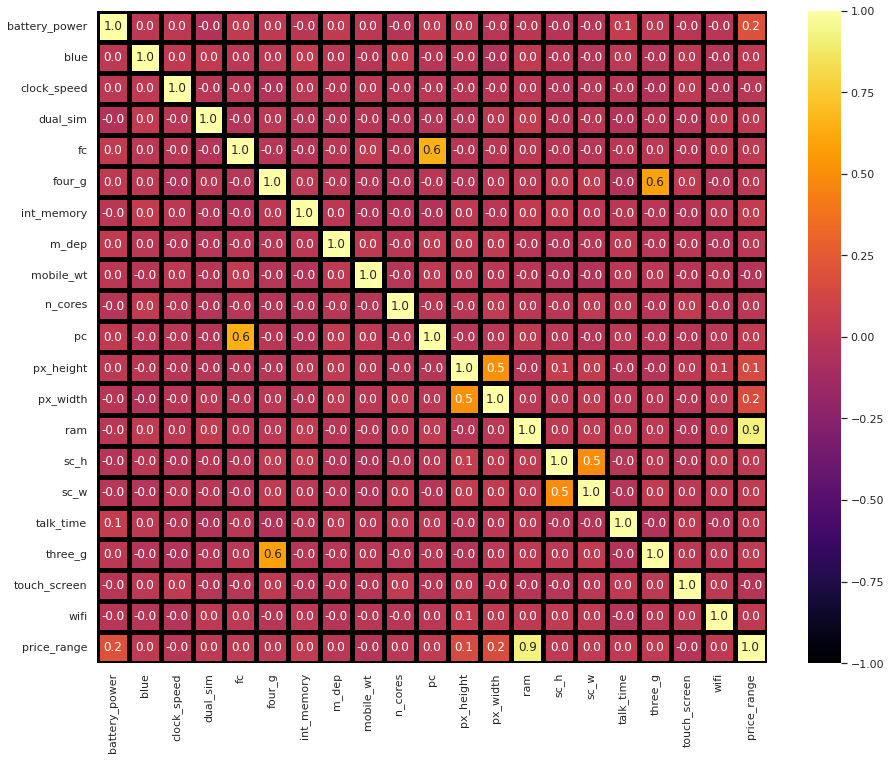

In [23]:
fig, ax = plt.subplots(figsize=(15,12))         

sns.heatmap(corr,
            vmin = -1,        #valor minimo de la escala
            vmax = 1,         #valor max de la escala
            annot = True,     #valores en las casillas
            fmt=".1f",        #formato de los annot
            linewidths=.5,  
            cmap = sns.color_palette("inferno", as_cmap=True) ,     
            ax=ax, #ejes
            linewidth = 5,   
            linecolor= 'black',
            square = False)

En este Heatmap

* Las variables inversamente proporcionales serian las de color negro (no hay ninguna).

* Las variables no correladas serian las de color rojo (la gran mayoria).

* Las variables directamente proporcionales serian las que se acerquen al color amarillo (hay pocos casos).

No analizaremos las variables cuyo indice de correlacion sea 0 (pues esto significa que una no ejerce influencia sobre la otra) o un valor cercano a este. Por criterio experto, aquellas cuyo indice de correlacion este en un rango de (- 0.25 ; 0.25) no serán estudiadas.

Con esta informacion, ya tenemos un mapa a seguir para poder analizar las relaciones entre las variables y poder cumplir con el primer objetivo de nuestro proyecto.

Iniciemos viendo la relacion mas fuerte encontrada en el heatmap : RAM -  PRICE_RANGE

RAM VS PRICE_RANGE

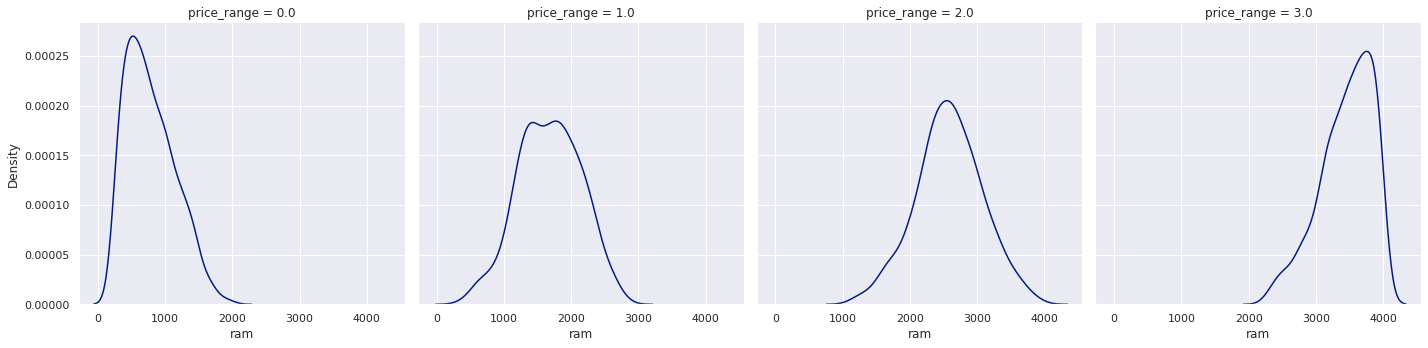

In [24]:
sns.displot( data = df_2 ,  x = df_2['ram'], col = df_2['price_range'],kind = 'kde')            

Observamos lo siguiente:
* Todos los graficos siguen una distribucion normal.
* Los celulares que cuestan muy poco, o muy caro, poseen una menor variedad en cuanto a eleccion de memoria RAM.
* Celulares que tienen una opcion mas variada en cuanto a memoria RAM son aquellos que suelen estar en precios intermedios.
* Podemos observar tambien que pocos telefonos llegan a los 4000 Megabytes de RAM, en el siguiente grafico podemos ver que la mayoria ronda alrededor de los 3.5k.

Los graficos se cruzan entre si, veamos en scatterplot que sucede.

<AxesSubplot:xlabel='ram', ylabel='price_range'>

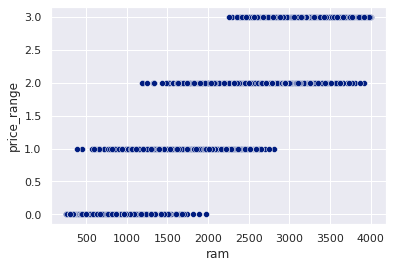

In [25]:
sns.scatterplot(df_2['ram'] , df_2['price_range'])

Podemos ver que hay celulares de menores costos que ofrecen misma memoria RAM que opciones superiores en cuanto a costo. Es decir ¿Por que comprar un celular de 2000 de memoria RAM de precio alto(2), si puedo comprar uno con la misma capacidad de precio intermedio(1)?

Esto nos lleva a preguntarnos ¿Que otros factores pueden influenciar en el precio final de un celular?

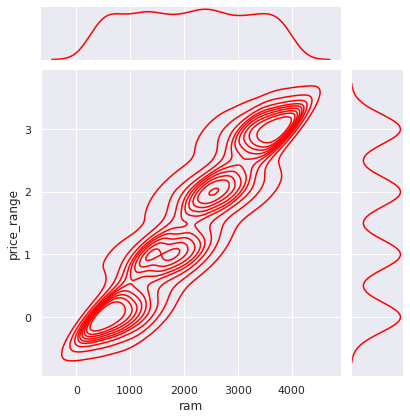

In [26]:
sns.jointplot( data = df_2 ,  x = 'ram', y = df_2['price_range'],
            kind = 'kde', color = 'red')

<AxesSubplot:xlabel='price_range', ylabel='ram'>

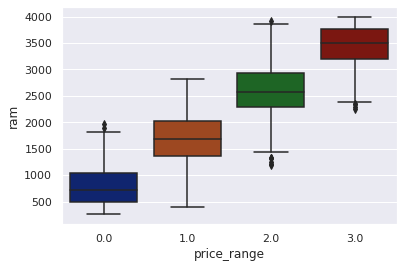

In [27]:
sns.boxplot(x = df_2['price_range'] , y = df_2['ram'])

Veamos otra correlacion encontrada :  px_height - px_weight

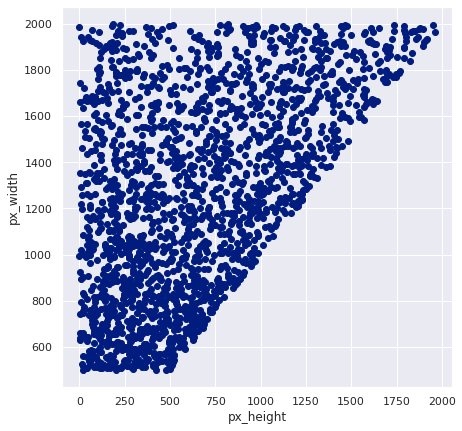

In [29]:
x = df_2['px_height']
y = df_2['px_width'] 

fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x,y,'o' )  
plt.xlabel('px_height')
plt.ylabel('px_width')
plt.show()

Clara tendencia positiva entre ancho y largo de pixeles en la pantalla.

Veamos la relacion entre la capacidad de la bateria y los tipos de precios.

<AxesSubplot:xlabel='battery_power', ylabel='price_range'>

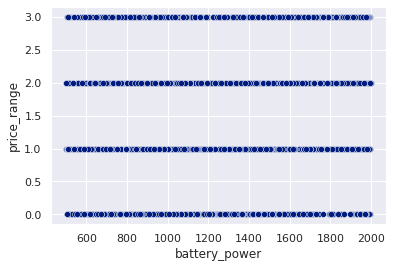

In [30]:
sns.scatterplot(x = df_2.battery_power , y = df_2.price_range)

El gráfico nos permite ver que hay practicamente igualdad de opciones en cuanto a bateria para celulares de todo tipo de precio.

<AxesSubplot:xlabel='int_memory', ylabel='price_range'>

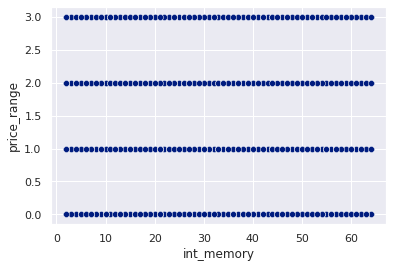

In [32]:
sns.scatterplot(x = df_2.int_memory , y = df_2.price_range)

En cuanto a memoria, vemos que el conjunto de celulares dispuestos a ser clasificados no presentan alguna conducta parcial con respecto a la memoria interna de los equipos. Para todo tipo de precio hay una amplia variedad de equipos con todo tipo de almacenamiento.

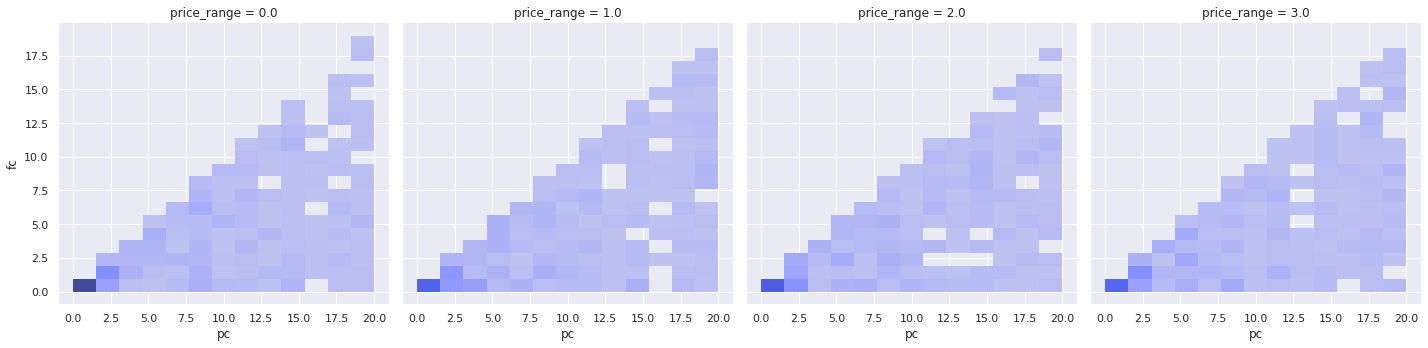

In [34]:
sns.displot(data = df_2 , x = df_2.pc , y = df_2.fc , col = 'price_range')

Otra tendencia lineal que podemos ver es entre los megapixeles de la camara frontal y la camara principal.

Hay que tener en cuenta que muchas veces la camara principal es la frontal, aunque pueden haber equipos donde esto no se cumpla, y vemos en estos graficos que si tenemos equipos con esa caracteristica. 

El rango de precio no es  diferenciador algunos para esta tendencia lineal.

<AxesSubplot:xlabel='pc', ylabel='fc'>

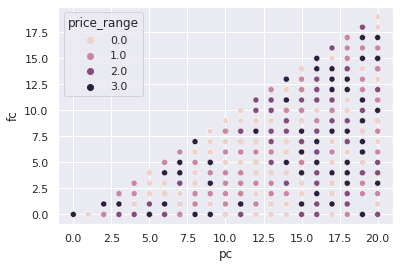

In [33]:
sns.scatterplot(x = df_2.pc , y = df_2.fc , hue = df_2.price_range )

En este grafico de dispersion podemos ver mejor como el rango de precio no es diferenciador para las variables fc y pc.

# ENTRENAMIENTO DEL MODELO

Antes de aplicar el algoritmo de SVM, debemos escalar los datos, pues este algoritmo lo requiere.

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(df_2.drop('price_range',axis=1)).transform(df_2.drop('price_range',axis=1))
df_scaled = pd.DataFrame(scaled, columns=df_2.columns[:-1])
df_scaled.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.174960,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.834911,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-1.087378,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.427428,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-1.087378,0.730240,0.559641,0.994018,-1.014099


Separamos nuestras variables predictoras del target

In [36]:
X = df_scaled 
y = df_2['price_range']

In [37]:

from sklearn.model_selection import train_test_split

X_train , X_test  , y_train , y_test = train_test_split(X,y , test_size = 0.3 , stratify=y , random_state = 1)

Importamos el algoritmo y lo ajustamos a nuestros datos

In [61]:
from sklearn.svm import SVC

svc = SVC(decision_function_shape='ovo')  
svc.fit(X_train,y_train)

# en este trabajo estamos haciendo una clasificacion multiclase, por ello haremos que la funcion
# de decision sera ovo (one versus one)

SVC(decision_function_shape='ovo')

In [62]:
#revisamos el algoritmo
svc

SVC(decision_function_shape='ovo')

In [63]:
#medimos el accuracy del algoritmo 

from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = svc.predict(X_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.867


[Text(0.5, 1.0, 'Matriz de confusion')]

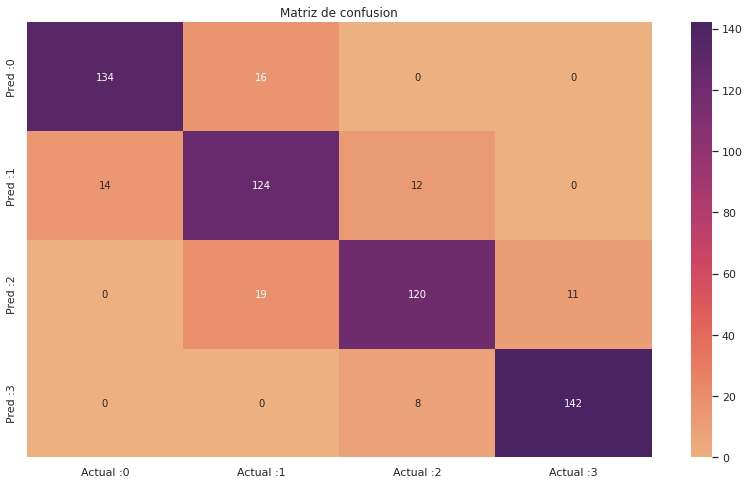

In [59]:
# una matrix de confusion siempre es util para ver estos problemas de clasificacion

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual :0', 'Actual :1','Actual :2','Actual :3'],  
                         index=['Pred :0', 'Pred :1','Pred :2','Pred :3'])

g = sns.heatmap(cm_matrix, annot=True, fmt='d',xticklabels='auto', yticklabels='auto', cmap='flare') 
g.set(title = 'Matriz de confusion')

Este modelo, con los parametros por default, arrojo un 86.7% de accuracy, y una matriz de confusion bastante buena. Sin embargo, veamos si podemos mejorar este resultado.

# Optimizacion de hiperparametros

Buscaremos los mejores parametros para el algoritmo SVM.

En esta seccion veremos la participacion de 3 nuevos parametros:

* C
* Gamma
* Kernel

##KERNEL

Un kernel es una funcion matematica que nos permite elevar la dimensionalidad de los datos, de esa forma podremos separar los datos mediante planos, cuando originalmente esto no se podia.

A este proceso se le conoce como 'kernel trick'.

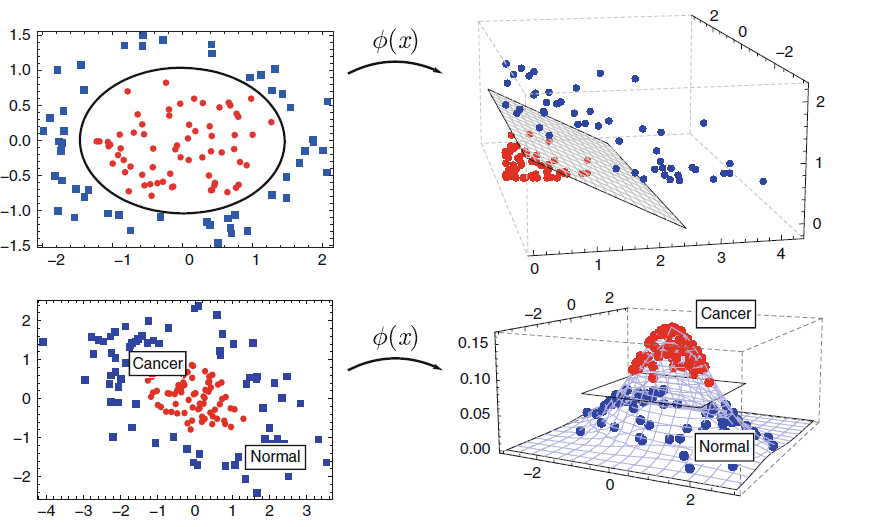

Tenemos distintos tipos de kernel, y la eleccion de este puede afectar en gran manera al poder de clasificacion del algoritmo.

## C

C es un parametro de regularizacion , le dice al algoritmo cuanto error de clasificacion va a evitar en cada dato de entrenamiento. Hay que escoger con cuidado este parametro pues puede suceder lo siguiente:

* Para un valor C grande, podria haber overfitting (memorizar los resultados).

* Para valores muy pequeños, se podria clasificar erroneamente una cantidad considerable de datos y perder accuracy en el proceso.

Hay que buscar un equilibrio. Se recomienda potencias de 10 para realizar una exploracion inicial.


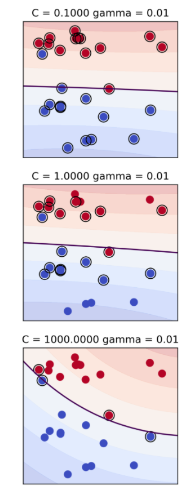

## Gamma

El parametro gamma nos indica cuanta curvatura queremos tener en nuestra frontera de decision, a mayor gamma mayor curvatura.

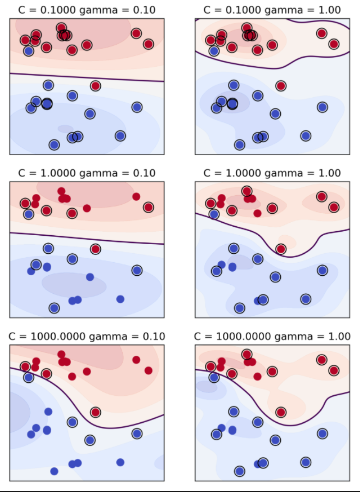

In [42]:

from sklearn.model_selection import GridSearchCV

# realizar un diccionario para un proceso iterativo es una manera ordenada de proceder
estimadores = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 

grid = GridSearchCV( svc , estimadores, refit=True, verbose=1, cv = 10)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

#este proceso generara un gran coste de maquina, hay que proceder con cuidado si el dataset 
#es demasiado grande

Fitting 10 folds for each of 126 candidates, totalling 1260 fits
Best params: {'C': 10, 'gamma': 1, 'kernel': 'linear'}


El GridSearchCV nos ha encontrado los valores mas optimos de los que le hemos dado en la lista de opciones. Vamos a ir viendo como poco a poco el 86.7%  va mejorando cuando procedemos a implementar el algoritmo con los nuevos valores encontrados.

PASO 1 : C y gamma por defecto,  kernels variables

[0.86667, 0.75667, 0.955]


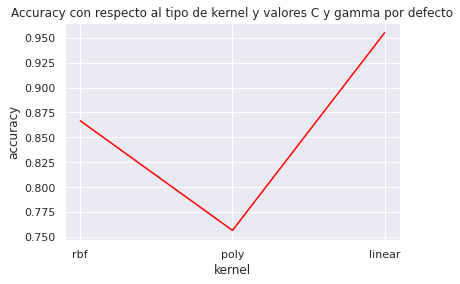

In [43]:
kernel =  ['rbf', 'poly', 'linear']
acc_1 = []
SVC()

for k in kernel:
   
    svc = SVC(kernel = k).fit(X_train , y_train)
    y_prediction =  svc.predict(X_test) 
    a = np.round( accuracy_score(y_test, y_prediction) , 5) 

    acc_1.append(a)

print(acc_1)
plt.plot(kernel,acc_1,'red')
plt.style.use("seaborn-dark-palette")
plt.xlabel('kernel')
plt.ylabel('accuracy')
plt.title('Accuracy con respecto al tipo de kernel y valores C y gamma por defecto')
plt.show()

El algoritimo que inicialmente se ejecuto se hizo con los parametros por defecto, ahora haciendo una eleccion de kernel de tipo lineal subio el accuracy a un 95.5%. Podriamos deternos aqui pero continuemos viendo los resultados.

PASO 2 : C y gamma optimos, y kernels variables

[0.32333, 0.75333, 0.96333]


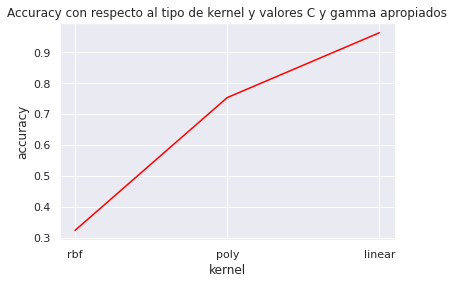

In [44]:
kernel =  ['rbf', 'poly', 'linear']
acc_2 = []

for k in kernel:
   
    svc = SVC( C = 10 , gamma = 1 , kernel = k).fit(X_train , y_train)
    y_prediction =  svc.predict(X_test) 
    a = np.round( accuracy_score(y_test, y_prediction) , 5) 

    acc_2.append(a)

print(acc_2)

plt.plot(kernel,acc_2,'red')
plt.style.use("seaborn-dark-palette")
plt.xlabel('kernel')
plt.ylabel('accuracy')
plt.title('Accuracy con respecto al tipo de kernel y valores C y gamma apropiados')
plt.show()

Si elegimos los valores C y gamma apropiados, vemos que el 95.5% de accuracy sube a un 96.3% . Aunque no es una diferencia notable, todo porcentaje de mejora siempre es bien recibido, sobre todo cuando este no involucra un gasto fuerte de maquina.

Text(0.5, 1.0, 'COMPARACION DE ACCURACY ENTRE EL MODELO OPTIMIZADO Y NO OPTIMIZADO')

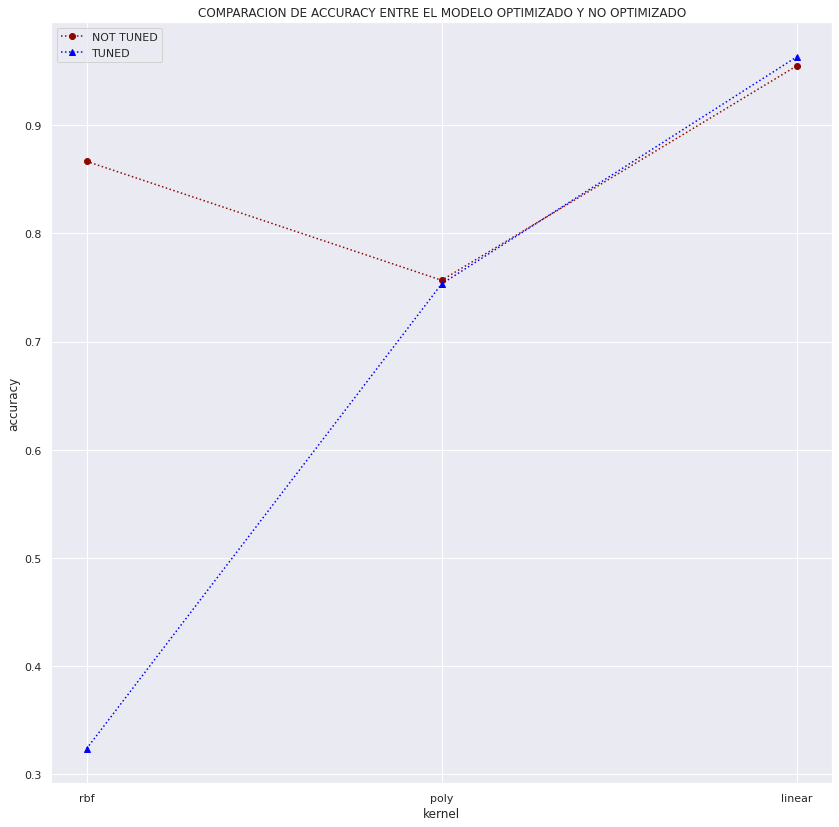

In [45]:
fig, ax = plt.subplots(figsize=(14,14))
ax.plot(kernel,acc_1,'r', alpha = 1 , marker = 'o', linestyle = 'dotted' , label='NOT TUNED')  
ax.plot(kernel,acc_2,'blue' , marker = '^', linestyle = 'dotted' , label = 'TUNED')
ax.legend()
ax.set_xlabel('kernel')
ax.set_ylabel('accuracy')
ax.set_title('COMPARACION DE ACCURACY ENTRE EL MODELO OPTIMIZADO Y NO OPTIMIZADO')

En este caso podemos ver como haciendo optimizacion de parametros pordemos mejorar un poco el performance de nuestro modelo.

Es curioso ver como el kernel RBF obtiene un gran resultado cuando el modelo esta parametrizado por defecto y un mal resultado cuando lo parametrizamos nosotros. Normalmente el RBF es el kernel que mejor resultado da.

Veamoslo ahora mediante una matriz de confusion


[Text(0.5, 1.0, 'Matriz de confusion con parametros tunning')]

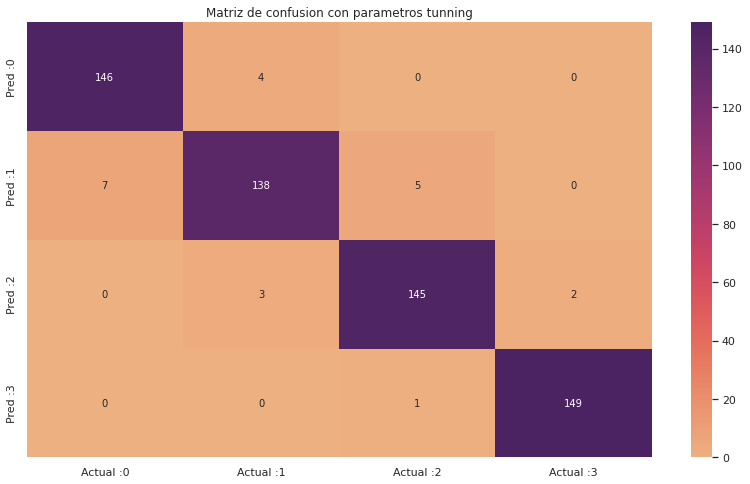

In [64]:
svc = SVC(C=10 , gamma = 1 , kernel = 'linear') 
svc.fit(X_train,y_train)
y_prediction_2 = svc.predict(X_test)

cm_2 = confusion_matrix(y_test, y_prediction_2)
cm_matrix_2 = pd.DataFrame(data=cm_2, columns=['Actual :0', 'Actual :1','Actual :2','Actual :3'],  
                         index=['Pred :0', 'Pred :1','Pred :2','Pred :3'])


g_2 = sns.heatmap(cm_matrix_2, annot=True, fmt='d',xticklabels='auto', yticklabels='auto', cmap='flare') 
g_2.set(title = 'Matriz de confusion con parametros tunning')

Esta matriz de confusion tiene mejores valores que la vista anteriormente. Nuestro algoritmo esta clasificando muy bien.

Finalmente, para añadir un poco, veremos el peso de las variables para el proceso de clasificacion.

In [47]:
# Seleccion por Random Forest
from sklearn.ensemble import RandomForestClassifier # Paso01: Instancio el algoritmo
forest = RandomForestClassifier()                   # Paso02: Configuro el algoritmo
forest.fit(X,y)                                     # Paso03: Ajuste el algoritmo
importances = forest.feature_importances_           # Paso04: Variables importantes

In [48]:
# Seleccion por Random Forest
TablaImportancia = pd.concat([pd.DataFrame({'Driver':list(X.columns)}),
                              pd.DataFrame({'Importancia':list(forest.feature_importances_)})],
                              axis = 1)
ImportanciaVariables = TablaImportancia[['Driver','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
#ImportanciaVariables

In [49]:
ImportanciaVariables

,Driver,Importancia
0,ram,0.501091
1,battery_power,0.074861
2,px_height,0.057467
3,px_width,0.054703
4,mobile_wt,0.038717
5,int_memory,0.035846
6,talk_time,0.028064
7,sc_h,0.026498
8,pc,0.026353
9,clock_speed,0.025614


In [50]:
ImportanciaVariables.Importancia.cumsum()

0     0.501091
1     0.575952
2     0.633420
3     0.688123
4     0.726840
5     0.762686
6     0.790750
7     0.817248
8     0.843601
9     0.869215
10    0.894449
11    0.918449
12    0.942375
13    0.963978
14    0.970292
15    0.976550
16    0.982713
17    0.988784
18    0.994569
19    1.000000
Name: Importancia, dtype: float64

Segun este Random Forest, RAM seria la variable con mas influencia de clasificacion con casi 50% de poder de prediccion.

Esto es algo demasiado bueno para ser cierto, por eso aplicaremos un metodo mas, llamado WOE.

In [54]:
! pip install woe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
final_iv, IV = data_vars(df_scaled,df_2.price_range)

In [56]:

IV.sort_values('IV',ascending=False)

,VAR_NAME,IV
13,ram,0.432478
0,battery_power,0.099664
12,px_width,0.065343
11,px_height,0.032736
6,int_memory,0.005934
8,mobile_wt,0.002787
18,touch_screen,0.002059
15,sc_w,0.001441
10,pc,0.001398
4,fc,0.001388


Vemos como en ambos casos, la variable que mas peso tiene es RAM

#Conclusion

Suppor Vector Machine es un algoritmo bastante util cuando tienes un dataset de tamaño moderado. Nos da un buen poder de prediccion y nos permite ademas ajustar sus parametros para llegar a un resultado apropiado de acuerdo al contexto del problema a tratar. 

Existen variedades de este algoritmo, algunas de ellas bastante robustas (como el Twin Support Vector Machine), sin embargo eso va mas alla del objetivo de este notebook.

Anexos

In [53]:

import woe 
from woe.eval import plot_ks
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
import os
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
import warnings
warnings.filterwarnings('ignore')
max_bin = 20
force_bin = 3


# Creamos las Woes - IV
max_bin = 20
force_bin = 3

def mono_bin(Y, X, n = max_bin):
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)


def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)


def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)